In [253]:
import numpy as np
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
from tempfile import TemporaryFile
'''
Average Direct Normal Irradiance (ADNI)
Average Precipitation (AP) 3
Average Relative Humidity (ARH) 
Maximum Direct Normal Irradiance (MDNI) 2
Maximum Surface Temperature (MaxSur) 
Minimum Surface Temperature (MinSur) 1
Average Surface Temperature (AvgSur)

Maturity Group (MG), Genotype ID, State, Year, and Location for each performance record.
'''

'\nAverage Direct Normal Irradiance (ADNI)\nAverage Precipitation (AP) 3\nAverage Relative Humidity (ARH) \nMaximum Direct Normal Irradiance (MDNI) 2\nMaximum Surface Temperature (MaxSur) \nMinimum Surface Temperature (MinSur) 1\nAverage Surface Temperature (AvgSur)\n\nMaturity Group (MG), Genotype ID, State, Year, and Location for each performance record.\n'

In [83]:
data = np.load('training/inputs_others_train.npy')

In [84]:
df = pd.DataFrame(data)

In [85]:
weather_data = np.load('training/inputs_weather_train.npy')


In [95]:
columns = ['ADNI','AP','ARH','MDNI','MaxSur','MinSur','AvgSur']

In [88]:
newarr = weather_data.reshape(93028*214, 7)

In [93]:
df2 = pd.DataFrame(newarr)
df2 = df2.drop(df2.index[93028:])

In [96]:
df2

,0,1,2,3,4,5,6
0,169.88,0.00,50.50,814.0,57.3,32.3,43.23
1,12.54,0.01,84.75,93.0,51.3,36.6,43.85
2,321.38,0.00,65.08,986.0,56.7,28.9,42.07
3,153.67,0.00,63.50,777.0,67.7,43.9,52.45
4,6.75,0.01,71.00,118.0,63.8,38.8,47.25
...,...,...,...,...,...,...,...
93023,290.92,0.00,40.88,773.0,84.7,63.4,71.90
93024,239.33,0.00,35.13,869.0,87.2,62.4,73.53
93025,197.00,0.00,44.04,696.0,82.0,65.3,74.08
93026,360.08,0.00,45.00,943.0,80.2,51.6,66.02


In [97]:
df2.columns = ['ADNI','AP','ARH','MDNI','MaxSur','MinSur','AvgSur']

In [98]:
df2

,ADNI,AP,ARH,MDNI,MaxSur,MinSur,AvgSur
0,169.88,0.00,50.50,814.0,57.3,32.3,43.23
1,12.54,0.01,84.75,93.0,51.3,36.6,43.85
2,321.38,0.00,65.08,986.0,56.7,28.9,42.07
3,153.67,0.00,63.50,777.0,67.7,43.9,52.45
4,6.75,0.01,71.00,118.0,63.8,38.8,47.25
...,...,...,...,...,...,...,...
93023,290.92,0.00,40.88,773.0,84.7,63.4,71.90
93024,239.33,0.00,35.13,869.0,87.2,62.4,73.53
93025,197.00,0.00,44.04,696.0,82.0,65.3,74.08
93026,360.08,0.00,45.00,943.0,80.2,51.6,66.02


In [99]:
df.columns = ['MG','Geno ID','State','Year','Location']

In [100]:
df2

,ADNI,AP,ARH,MDNI,MaxSur,MinSur,AvgSur
0,169.88,0.00,50.50,814.0,57.3,32.3,43.23
1,12.54,0.01,84.75,93.0,51.3,36.6,43.85
2,321.38,0.00,65.08,986.0,56.7,28.9,42.07
3,153.67,0.00,63.50,777.0,67.7,43.9,52.45
4,6.75,0.01,71.00,118.0,63.8,38.8,47.25
...,...,...,...,...,...,...,...
93023,290.92,0.00,40.88,773.0,84.7,63.4,71.90
93024,239.33,0.00,35.13,869.0,87.2,62.4,73.53
93025,197.00,0.00,44.04,696.0,82.0,65.3,74.08
93026,360.08,0.00,45.00,943.0,80.2,51.6,66.02


In [101]:
yield_data = np.load('training/yield_train.npy')

In [102]:
df3 = pd.DataFrame(yield_data)

In [103]:
df = df3.join(df)

In [104]:
df_merged = df2.join(df)

In [110]:
df_merged.columns = ['ADNI','AP','ARH','MDNI','MaxSur','MinSur','AvgSur', 'CropY','MG','Geno ID','State','Year','Location']

In [111]:
df_merged

,ADNI,AP,ARH,MDNI,MaxSur,MinSur,AvgSur,CropY,MG,Geno ID,State,Year,Location
0,169.88,0.00,50.50,814.0,57.3,32.3,43.23,39.0,3.0,243.0,"""KS""",2009.0,98.0
1,12.54,0.01,84.75,93.0,51.3,36.6,43.85,54.2,6.0,114.0,"""AL""",2013.0,16.0
2,321.38,0.00,65.08,986.0,56.7,28.9,42.07,73.6,4.0,2878.0,"""TN""",2015.0,72.0
3,153.67,0.00,63.50,777.0,67.7,43.9,52.45,70.9,3.0,4535.0,"""MO""",2014.0,94.0
4,6.75,0.01,71.00,118.0,63.8,38.8,47.25,82.1,3.0,4501.0,"""NE""",2008.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93023,290.92,0.00,40.88,773.0,84.7,63.4,71.90,22.2,8.0,1774.0,"""AL""",2014.0,144.0
93024,239.33,0.00,35.13,869.0,87.2,62.4,73.53,68.6,4.0,1363.0,"""IL""",2008.0,17.0
93025,197.00,0.00,44.04,696.0,82.0,65.3,74.08,65.6,2.0,182.0,"""IN""",2006.0,150.0
93026,360.08,0.00,45.00,943.0,80.2,51.6,66.02,43.5,5.0,699.0,"""LA""",2008.0,1.0


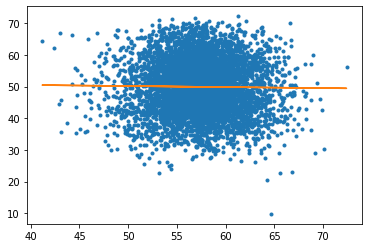

In [238]:
DF = df_merged.groupby(['Geno ID']).mean()
x = DF['MinSur']
y = DF['CropY']
plt.plot(x, y, '.')

m, b = np.polyfit(x, y, 1)


plt.plot(x, m*x + b)

In [239]:
cm = np.corrcoef(x, y)
cxy = cm[0,1]
r_squared = cxy**2
r_squared

0.00019409169731148118

In [240]:
cluster = np.load('clusterID_genotype.npy')

In [241]:
testothers = np.load('Test Inputs/inputs_others_test.npy')
testweather = np.load('Test Inputs/inputs_weather_test.npy')

In [242]:
df_test = pd.DataFrame(testothers)

In [243]:
newarr = testweather.reshape(10337*214, 7)
df_test2 = pd.DataFrame(newarr)

In [244]:
df_test2 = df_test2.drop(df_test2.index[10337:])

In [245]:
df_test2.columns = ['ADNI','AP','ARH','MDNI','MaxSur','MinSur','AvgSur']
df_test.columns = ['MG','Geno ID','State','Year','Location']

In [246]:
df_test = df_test.join(df_test2)

In [247]:
df_test

,MG,Geno ID,State,Year,Location,ADNI,AP,ARH,MDNI,MaxSur,MinSur,AvgSur
0,3.0,3069.0,"""IA""",2010.0,41.0,335.75,0.00,75.67,932.0,80.8,59.2,67.33
1,4.0,2526.0,"""IN""",2004.0,154.0,20.75,0.00,66.67,257.0,74.1,62.2,66.02
2,3.0,636.0,"""IA""",2014.0,41.0,300.04,0.02,77.67,978.0,60.7,41.5,52.01
3,5.0,1350.0,"""MD""",2005.0,113.0,77.25,0.00,76.04,380.0,67.6,45.5,54.00
4,3.0,2983.0,"""IL""",2006.0,148.0,211.50,0.02,84.17,951.0,66.1,43.5,54.43
...,...,...,...,...,...,...,...,...,...,...,...,...
10332,1.0,4511.0,"""MI""",2013.0,64.0,341.13,0.00,63.50,908.0,96.1,66.9,81.62
10333,3.0,5106.0,"""NE""",2007.0,136.0,351.96,0.00,64.17,904.0,95.8,69.6,83.18
10334,2.0,5826.0,"""IL""",2008.0,148.0,331.33,0.00,63.17,901.0,96.8,69.6,83.38
10335,1.0,5466.0,"""SD""",2005.0,10.0,353.21,0.00,64.92,911.0,95.6,72.0,83.91


In [251]:
yield_list = []

for row in df_test['MinSur']:
    y = (m*row)+b
    yield_list.append(y)
    
result = np.array(yield_list)

In [254]:
np.save("result.npy", result)